In [ ]:
""" 
Reads csv files from ./results and generates a plot for each case

file name: case_x_compiler_device_photons.csv
where x is the case number, 
compiler is the compiler used, 
device is the device where the test was run,
photons is the amount of photons used in the simulation


csv file is expected to have the following format:
photons,time,photons_per_second

Compare from each case both compilers in the same amonut of photons.
"""

In [9]:
import os
import matplotlib.pyplot as plt
import numpy as np
import csv

In [26]:
files = os.listdir('./results')
cases = {}

for file in files:
    if file.endswith('.csv'):
        _,case, compiler, device, photons = file.split('_')
        photons = photons.split('K')[0]
        if case not in cases:
            cases[case] = {}
        if compiler not in cases[case]:
            cases[case][compiler] = {}
        if device not in cases[case][compiler]:
            cases[case][compiler][device] = {}
        # open file and extract row of max photons per second
        with open('./results/' + file, 'r') as f:
            reader = csv.reader(f)
            next(reader)
            max_pps = max(reader, key=lambda row: row[2])
            cases[case][compiler][device][photons] = max_pps

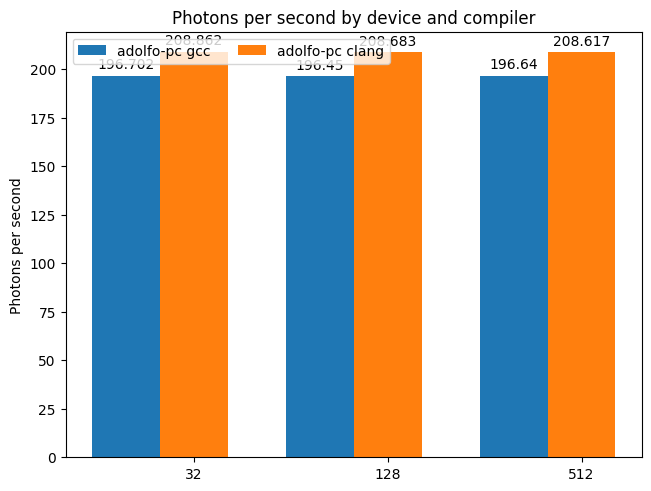

In [34]:
""" 
Crate a grouped bar graph for case 0 for each device
for each device compare the compilers in the same amount of photons

for 32k photons there should be 2 bars grouped, one for each compiler

following the next example:

species = ("Adelie", "Chinstrap", "Gentoo")
penguin_means = {
    'Bill Depth': (18.35, 18.43, 14.98),
    'Bill Length': (38.79, 48.83, 47.50),
    'Flipper Length': (189.95, 195.82, 217.19),
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Length (mm)')
ax.set_title('Penguin attributes by species')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 250)

plt.show()

"""

case = '0'
devices = list(cases[case]['gcc'].keys())
devices.sort()
photons = [int(p) for p in (cases[case]['gcc'][devices[0]].keys())]
photons.sort()
gcc = []
clang = []
for device in devices:
    gcc.append([float(cases[case]['gcc'][device][str(photon)][2]) for photon in photons])
    clang.append([float(cases[case]['clang'][device][str(photon)][2]) for photon in photons])

x = np.arange(len(photons))
width = 0.35
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for i, device in enumerate(devices):
    offset = width * multiplier
    gcc_rects = ax.bar(x + offset, gcc[i], width, label=device + ' gcc')
    clang_rects = ax.bar(x + offset + width, clang[i], width, label=device + ' clang')
    ax.bar_label(gcc_rects, padding=3)
    ax.bar_label(clang_rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Photons per second')
ax.set_title('Photons per second by device and compiler')
ax.set_xticks(x + width, photons)
ax.legend(loc='upper left', ncol=2)

plt.show()